# Assignment 2 Itgel Ganbold 18407654

## Q4 i)
Coupled Fireflies Write a piece of code to solve the phase difference equation from question 6 numerically using the solve_ivp function from SciPy’s integrate module. You should solve the system on the interval 0 ≤ t ≤ 50 and evaluate the solution on a mesh of at least 1000 points. Set

$\omega_1 = 1.5, \omega_2 = 1$
### and
$\phi(0) = 0.$ 

## Problem statement:

$$\dot{\theta_1} = \omega_1+k\sin(\theta_2-\theta_1)$$ 
$$\dot{\theta_2} = \omega_2+k\sin(\theta_1-\theta_2)$$

### where 

$$\phi(t) = \theta_1-\theta_2$$

### It is easy to show that:

$$\dot{\phi} = \dot{\theta_1}-\dot{\theta_2} = \omega_1 - \omega_2 - 2k \sin(\phi)$$

In [213]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [214]:
def phi_dot(t, y):
    return 0.5 - 2*k*sin(y)                                                #define our ODE

In [215]:
k = 0
solution1 = solve_ivp(phi_dot, [0,50], [0], t_eval = np.arange(0,50,0.05)) #solve the ODE at various values of k

In [216]:
k = 0.1
solution2 = solve_ivp(phi_dot, [0,50], [0], t_eval = np.arange(0,50,0.05))

In [217]:
k = 0.2
solution3 = solve_ivp(phi_dot, [0,50], [0], t_eval = np.arange(0,50,0.05))

In [218]:
k = 0.5
solution4 = solve_ivp(phi_dot, [0,50], [0], t_eval = np.arange(0,50,0.05))

In [219]:
k = 1
solution5 = solve_ivp(phi_dot, [0,50], [0], t_eval = np.arange(0,50,0.05))

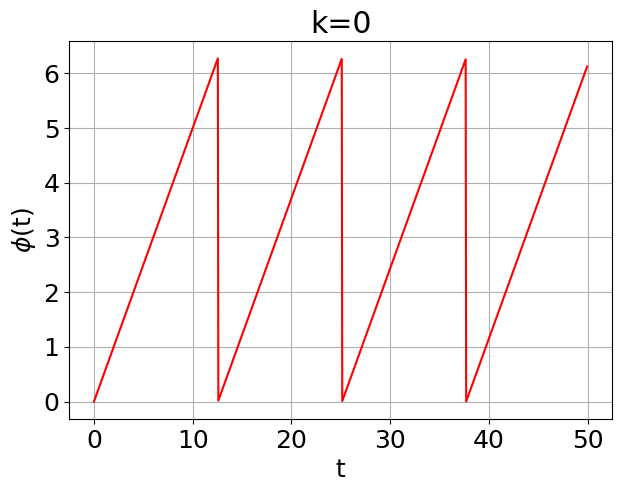

In [230]:
from matplotlib.pyplot import figure                                         #plot phi(t) against t, making sure [0 < phi < 2pi]
figure(figsize=(7,5), dpi=100)
plt.rcParams.update({'font.size': 18})
plt.plot(solution1.t,solution1.y[0]%(2*np.pi), color = 'r')
plt.grid()
plt.xlabel("t")
plt.ylabel(r'$\phi$(t)')
plt.title("k=0");

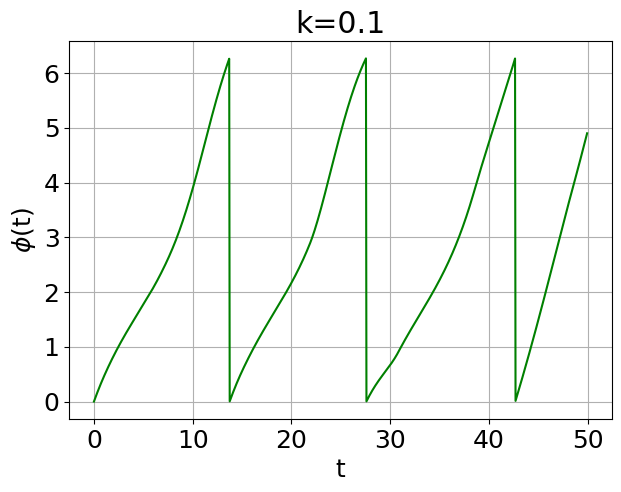

In [221]:
figure(figsize=(7,5), dpi=100)
plt.rcParams.update({'font.size': 18})
plt.plot(solution2.t,solution2.y[0]%(2*np.pi), color = 'g')
plt.grid()
plt.xlabel("t")
plt.ylabel(r'$\phi$(t)')
plt.title("k=0.1");

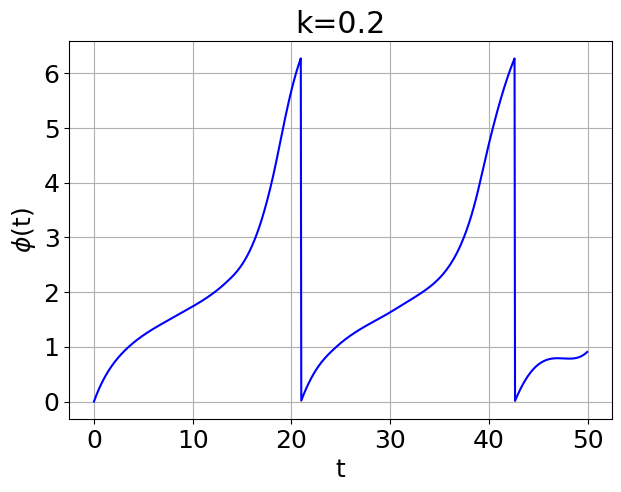

In [222]:
figure(figsize=(7,5), dpi=100)
plt.rcParams.update({'font.size': 18})
plt.plot(solution3.t,solution3.y[0]%(2*np.pi), color = 'b')
plt.grid()
plt.xlabel("t")
plt.ylabel(r'$\phi$(t)')
plt.title("k=0.2");

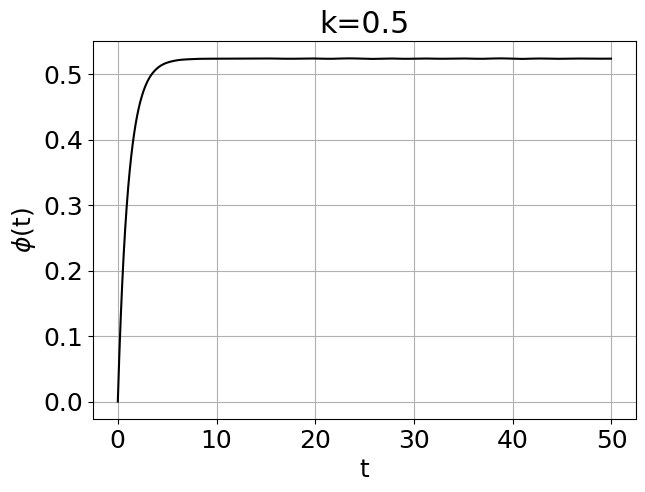

In [223]:
figure(figsize=(7,5), dpi=100)
plt.rcParams.update({'font.size': 18})
plt.plot(solution4.t,solution4.y[0]%(2*np.pi), color = 'black')
plt.grid()
plt.xlabel("t")
plt.ylabel(r'$\phi$(t)')
plt.title("k=0.5");

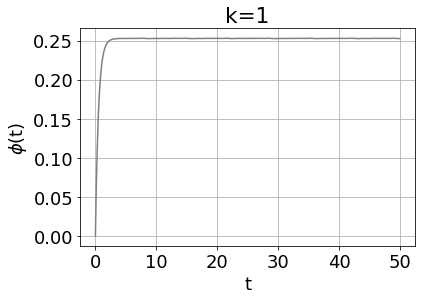

In [237]:
plt.rcParams.update({'font.size': 18})
plt.plot(solution5.t,solution5.y[0]%(2*np.pi), color = 'grey')
plt.grid()
plt.xlabel("t")
plt.ylabel(r'$\phi$(t)')
plt.title("k=1");

## ii) Compare the different types of behaviour we observe and discuss them in the context of the fireflies problem.

We see that when the parameter k is small, the phase difference oscilliates. When k = 0 the two fireflies are not coupled at all and are completely out of phase with one another. As k increases, we see the coupling start to occur as the phase differences start to decrease. The two are becoming more in sync with one another as each firefly is adjusting their frequency in accordance with the other firefly.

## iii) Discuss your simulation results in relation to the analytic results from question 6. Does the system behave as expected?

In question 6, we found that when k < 0.25, the phase difference oscillates as it has no fixed points. We see this in our simulation. Once k > 0.25, as in the case with k = 0.5, we see that the phase change is now stable (one entrails the other) and has taken a definite value with no oscillatory behaviour. 

## Q5. Consider the system 
$r' = r(1 − r^2) + \mu r \cos(\theta)$
## where
$\dot{\theta} = 1$ 

## Using Python, plot the phase portrait for various values of $\mu > 0$.

In [225]:
def r_dot(r,theta,mu):
    return r*(1-r**2)+mu*r*np.cos(theta)

def theta_dot(r,theta):
    return theta*0+1

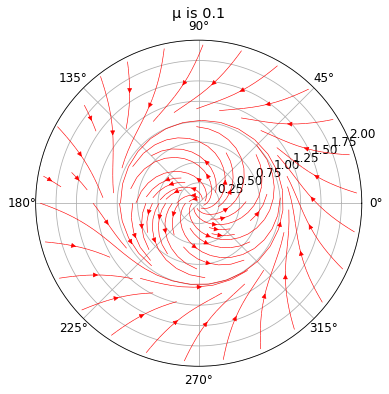

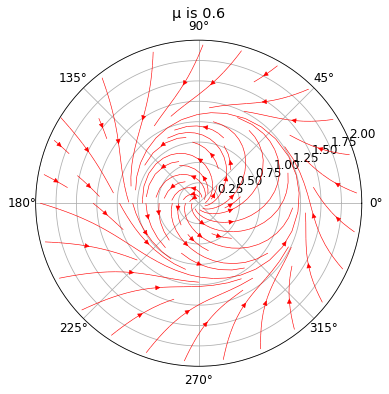

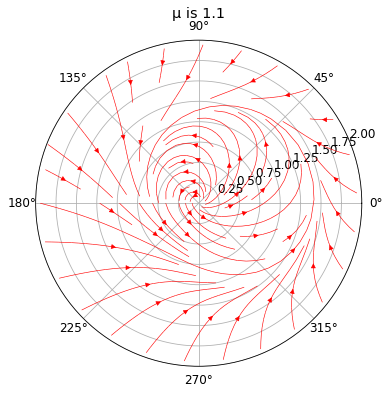

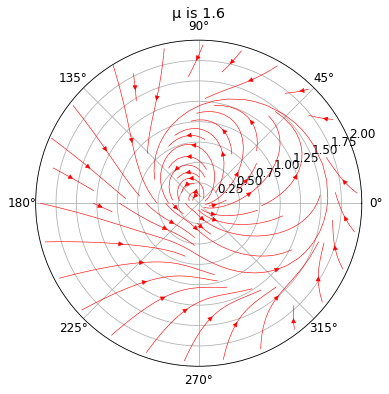

In [238]:
plt.rcParams.update({'font.size': 12})
r_values = np.linspace(0, 2, 20)
theta_values = np.linspace(-np.pi, np.pi, 50)
thets, rs = np.meshgrid(theta_values, r_values)
for mu in np.arange(0.1,2,0.5):
    d_r = r_dot(rs, thets, mu)
    dtheta = theta_dot(rs, thets) 
    fig = plt.figure(figsize=(6,6))
    axis = plt.axes(polar=True)

    plt.streamplot(theta_values, r_values, dtheta, d_r, density=0.9, linewidth = 0.6, color = 'r')
    plt.title(f'\u03BC is {mu}')
    plt.ylim(0, 2);


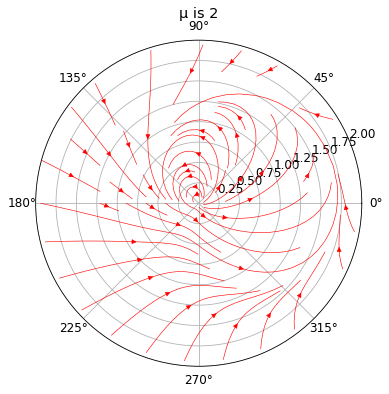

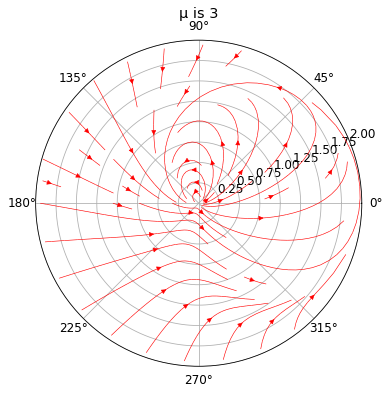

In [239]:
plt.rcParams.update({'font.size': 12})
for mu in np.arange(2,4):
    d_r = r_dot(rs, thets, mu)
    dtheta = theta_dot(rs, thets) 
    fig = plt.figure(figsize=(6,6))
    axis = plt.axes(polar=True)
    plt.streamplot(theta_values, r_values, dtheta, d_r, density=0.9, linewidth = 0.6, color = 'r')
    plt.title(f'\u03BC is {mu}')
    plt.ylim(0, 2);

##  Is there a critical value $\mu_c$ at which the closed orbit ceases to exist? If so, estimate it. If not, prove that a closed orbit exists for all $\mu > 0$.
### It appears that the closed orbit still remains as $\mu$ is varied. 
 Indeed, we can show by Poincare-Bendixson Theorem that for our annular region between $r_{min}$ and $r_{max}$.
 
 We have
 
 $$\dot{r} < 0 \rightarrow r_{max}(1-r_{max}^2+\mu \cos(\theta))<0$$
 
 $$r_{max} > \sqrt{1+\mu}$$
 similarly for the other boundary
 $$r_{min} < \sqrt{1-\mu}$$
 But we can see a limit cycle for $0<\mu<1$ from our plot, and since P-B Theorem sets no upper limit on $r_{max}$ it follows that
 a limit cycle must exist for all values of $\mu > 0$